In [1]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

In [2]:
m = folium.Map([-25.953724, 32.588711], zoom_start=10)
#m = folium.Map([-25.953724, 32.588711], zoom_start=10)
#m = folium.Map([-18.665695, 35.529562], zoom_start=10)
boundsdata ='C:/Users/bright/Desktop/aim_ishango/map5.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [3]:
# connect to the API
user = 'brightaboh' ## change this!
password = '7077Deladem!' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [4]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

GEOMETRYCOLLECTION(LINESTRING(36.1450 -18.7919,36.0791 -18.3962,35.7275 -18.1041,35.1782 -17.7068,35.0024 -17.1408,34.3433 -16.7204,33.9478 -16.4888,33.5962 -16.4888,33.3984 -16.7414,33.1348 -17.2877,33.0029 -17.6021,32.9590 -18.1459,32.8271 -18.9790,32.8271 -19.4769,33.0469 -19.8287,32.8491 -20.2210,32.6514 -20.5094,32.4536 -20.8383,32.4097 -21.2075,31.9482 -21.7391,31.3989 -22.3704,31.4429 -22.8369,31.9043 -24.2470,32.0361 -24.4871,32.0581 -24.8266,32.0361 -25.3837,32.0581 -25.5424,33.0908 -25.4036,33.8599 -24.9661,34.7607 -24.6870,35.5737 -24.1468,35.3760 -23.4632,35.5298 -22.9786,35.4199 -22.2688,35.2222 -21.5348,34.9585 -21.0640,34.6948 -20.5299,34.6948 -20.1591,34.8047 -19.9320,35.2881 -19.4355,35.8154 -19.0829,36.0571 -18.8751,35.1782 -18.8959,35.4199 -18.9375))


In [5]:
products = api.query(footprint,
                     date = ('20200225', '20210227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

Querying products:   6%|6         | 100/1664 [00:00<?, ?product/s]

In [6]:
print(len(products))

1664


In [7]:
products_gdf = api.to_geodataframe(products)
products_gdf.head(10)

title  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  S2B_MSIL2A_20210226T071849_N0214_R006_T36KYU_2...   
c8ac053a-44eb-42c7-93b3-a012a369319d  S2A_MSIL2A_20210224T072901_N0214_R049_T36KYU_2...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  S2A_MSIL2A_20210224T072901_N0214_R049_T36KZD_2...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  S2A_MSIL2A_20210224T072901_N0214_R049_T36KYV_2...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  S2A_MSIL2A_20210224T072901_N0214_R049_T36KXU_2...   
a31ed9e4-58b1-4a6f-9860-58bf177c4be5  S2A_MSIL2A_20210224T072901_N0214_R049_T36KYB_2...   
2ea81e54-d799-43fe-a5b4-a655817c9a10  S2A_MSIL2A_20210224T072901_N0214_R049_T36JWT_2...   
4666204b-4037-4f14-ad2c-1dc665002143  S2A_MSIL2A_20210224T072901_N0214_R049_T36JXT_2...   
d3efa72a-648b-4416-ba24-1696e6b91410  S2A_MSIL2A_20210224T072901_N0214_R049_T36KXC_2...   
5048f0c5-f3af-49b6-8ff8-cf1523b49f1c  S2A_MSIL2A_20210224T072901_N0214_R049_T36JYT_2...   

                                                                                   link  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
a31ed9e4-58b1-4a6f-9860-58bf177c4be5  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2ea81e54-d799-43fe-a5b4-a655817c9a10  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
4666204b-4037-4f14-ad2c-1dc665002143  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d3efa72a-648b-4416-ba24-1696e6b91410  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
5048f0c5-f3af-49b6-8ff8-cf1523b49f1c  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
a31ed9e4-58b1-4a6f-9860-58bf177c4be5  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2ea81e54-d799-43fe-a5b4-a655817c9a10  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
4666204b-4037-4f14-ad2c-1dc665002143  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d3efa72a-648b-4416-ba24-1696e6b91410  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
5048f0c5-f3af-49b6-8ff8-cf1523b49f1c  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
a31ed9e4-58b1-4a6f-9860-58bf177c4be5  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2ea81e54-d799-43fe-a5b4-a655817c9a10  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
4666204b-4037-4f14-ad2c-1dc665002143  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d3efa72a-648b-4416-ba24-1696e6b91410  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
5048f0c5-f3af-49b6-8ff8-cf1523b49f1c  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                          

In [8]:
#show data in tabular form
api.to_geodataframe(products)

title  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  S2B_MSIL2A_20210226T071849_N0214_R006_T36KYU_2...   
c8ac053a-44eb-42c7-93b3-a012a369319d  S2A_MSIL2A_20210224T072901_N0214_R049_T36KYU_2...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  S2A_MSIL2A_20210224T072901_N0214_R049_T36KZD_2...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  S2A_MSIL2A_20210224T072901_N0214_R049_T36KYV_2...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  S2A_MSIL2A_20210224T072901_N0214_R049_T36KXU_2...   
...                                                                                 ...   
f998bfd0-0793-4f52-9ded-8fa37317e203  S2B_MSIL2A_20200228T073839_N0214_R092_T36KYF_2...   
d15b49fa-a1e5-48ec-8f1b-379ffb13d261  S2A_MSIL2A_20200227T071841_N0214_R006_T36KYU_2...   
9679d725-78b5-4401-9462-459bcb066aa0  S2A_MSIL2A_20200226T074901_N0214_R135_T36KUA_2...   
cdc0dacc-da93-4b06-b04d-d101dd60672b  S2B_MSIL2A_20200225T072859_N0214_R049_T36KXD_2...   
f61c6aa1-37b0-47c9-b097-e25bed34abf2  S2B_MSIL2A_20200225T072859_N0214_R049_T36KXC_2...   

                                                                                   link  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
...                                                                                 ...   
f998bfd0-0793-4f52-9ded-8fa37317e203  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d15b49fa-a1e5-48ec-8f1b-379ffb13d261  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
9679d725-78b5-4401-9462-459bcb066aa0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
cdc0dacc-da93-4b06-b04d-d101dd60672b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f61c6aa1-37b0-47c9-b097-e25bed34abf2  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
...                                                                                 ...   
f998bfd0-0793-4f52-9ded-8fa37317e203  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d15b49fa-a1e5-48ec-8f1b-379ffb13d261  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
9679d725-78b5-4401-9462-459bcb066aa0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
cdc0dacc-da93-4b06-b04d-d101dd60672b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f61c6aa1-37b0-47c9-b097-e25bed34abf2  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
b99e2ab7-cc36-41b1-a773-e1438c2e2d9b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
c8ac053a-44eb-42c7-93b3-a012a369319d  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
99c736d7-ab35-4a04-8e32-0f0291a769a0  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
ea70eb32-7636-474c-b52d-49e2f8d85cfd  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
...                                                                                 ...   
f998bfd0-0793-4f52-9ded-8fa37317e203  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
d15b49fa-a1e5-48ec-8f1b-379ffb13d261  https://scihub.copernicus.eu/dhus/oda

<AxesSubplot:>

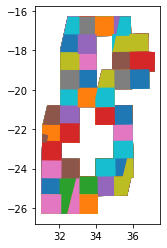

In [9]:
#Plot the areas
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

C:\Users\bright\AppData\Local\Temp/ipykernel_1536/1206559645.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


b99e2ab7-cc36-41b1-a773-e1438c2e2d9b    Annotation(35.7911, -24.0274, 'b99e2ab7-cc36-4...
c8ac053a-44eb-42c7-93b3-a012a369319d    Annotation(35.4819, -23.9718, 'c8ac053a-44eb-4...
99c736d7-ab35-4a04-8e32-0f0291a769a0    Annotation(36.3795, -19.4569, '99c736d7-ab35-4...
ea70eb32-7636-474c-b52d-49e2f8d85cfd    Annotation(35.4878, -23.0825, 'ea70eb32-7636-4...
2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1    Annotation(34.5228, -23.998, '2f612e7d-a90b-4c...
                                                              ...                        
f998bfd0-0793-4f52-9ded-8fa37317e203    Annotation(34.9541, -17.4734, 'f998bfd0-0793-4...
d15b49fa-a1e5-48ec-8f1b-379ffb13d261    Annotation(35.7993, -24.029, 'd15b49fa-a1e5-48...
9679d725-78b5-4401-9462-459bcb066aa0    Annotation(31.2003, -22.4652, '9679d725-78b5-4...
cdc0dacc-da93-4b06-b04d-d101dd60672b    Annotation(34.5943, -19.5077, 'cdc0dacc-da93-4...
f61c6aa1-37b0-47c9-b097-e25bed34abf2    Annotation(34.5024, -20.3971, 'f61c6aa1-37b0-4...
Length: 16

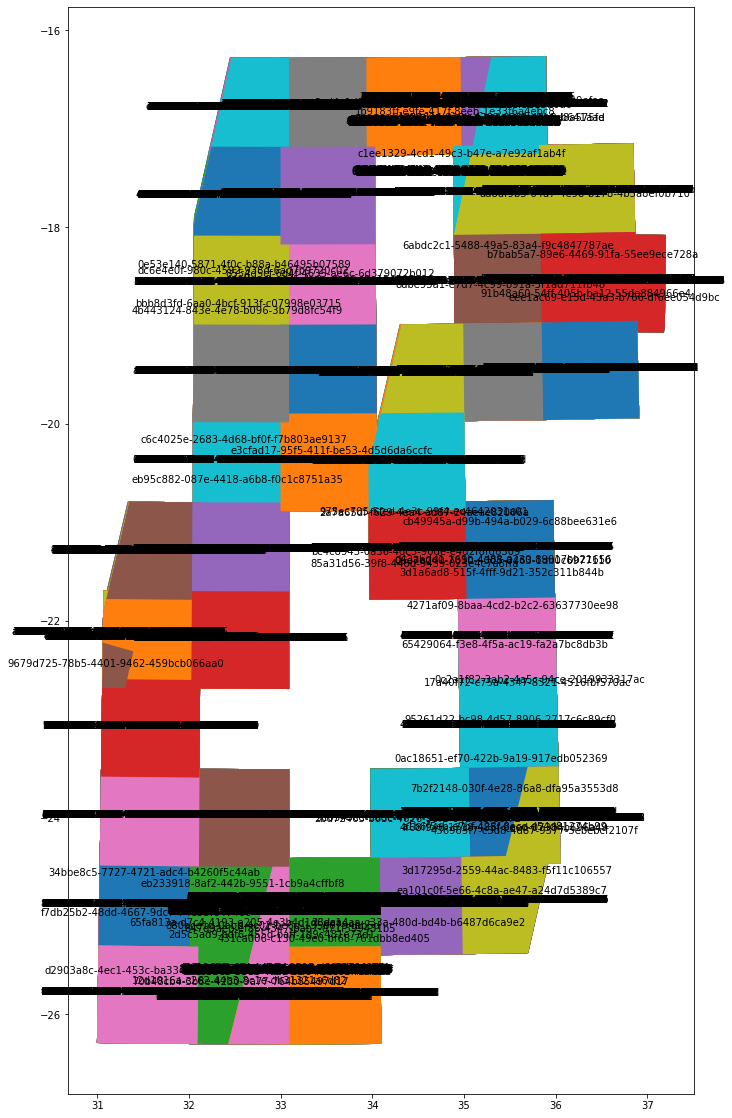

In [10]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

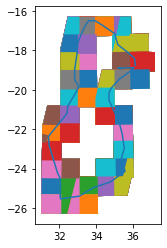

In [11]:
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [12]:
#Checking for the availability of product 
def checkProductId():
    for i in range(len(products_gdf['uuid'])):
        product_id = api.get_product_odata(products_gdf['uuid'][i])
        for j in product_id.keys():
            if j =='Online':
                print (f"For index ={i}, the product {products_gdf['uuid'][i]}"
                       f" is online True or False?: {product_id[j]}")
                

In [13]:
checkProductId()

For index =0, the product b99e2ab7-cc36-41b1-a773-e1438c2e2d9b is online True or False?: False
For index =1, the product c8ac053a-44eb-42c7-93b3-a012a369319d is online True or False?: False
For index =2, the product 99c736d7-ab35-4a04-8e32-0f0291a769a0 is online True or False?: False
For index =3, the product ea70eb32-7636-474c-b52d-49e2f8d85cfd is online True or False?: False
For index =4, the product 2f612e7d-a90b-4cd0-b0c8-a8b2f6da46b1 is online True or False?: False
For index =5, the product a31ed9e4-58b1-4a6f-9860-58bf177c4be5 is online True or False?: False
For index =6, the product 2ea81e54-d799-43fe-a5b4-a655817c9a10 is online True or False?: False
For index =7, the product 4666204b-4037-4f14-ad2c-1dc665002143 is online True or False?: False
For index =8, the product d3efa72a-648b-4416-ba24-1696e6b91410 is online True or False?: False
For index =9, the product 5048f0c5-f3af-49b6-8ff8-cf1523b49f1c is online True or False?: False
For index =10, the product 67bf449a-fbeb-409b-9a01

KeyboardInterrupt: 

In [33]:
api.get_product_odata(products)

ServerError: HTTP status 404 Not Found: UriNotMatchingException : Could not match segment: 'Products('OrderedDict(%5B('b99e2ab7-cc36-41b1-a773-e1438c2e2d9b',%20%7B'title':%20'S2B_MSIL2A_20210226T071849_N0214_R006_T36KYU_20210226T095133',%20'link':%20%22https:'.

In [17]:
api.download_all(products)

Fetching archival status:   0%|          | 6/1664 [00:02<10:16,  2.69product/s]

KeyboardInterrupt: 

In [38]:
#Download available product using the keys
api.download("d46f2532-2076-49af-975b-6aa84bdaa256")

api.download("d06c6e38-ef63-42f9-9311-0e997f09bcba")

MD5 checksumming:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.06G [00:00<?, ?B/s]

{'id': 'd06c6e38-ef63-42f9-9311-0e997f09bcba',
 'title': 'S2A_MSIL2A_20200811T073621_N0214_R092_T36JVS_20200811T114649',
 'size': 1056332327,
 'md5': '5b0a01ba840df4515224c1ad751d7eda',
 'date': datetime.datetime(2020, 8, 11, 7, 36, 21, 24000),
 'footprint': 'POLYGON((33.09727321436316 -25.68738862506163,33.088154896438965 -25.724973426866143,33.052226840800984 -25.872680954640828,33.01626681649104 -26.02037335107884,32.98025971211643 -26.168028448709816,32.94630838704703 -26.30718557652654,31.997812380416534 -26.30419536940984,32.00611910266008 -25.312841689418953,33.09696970925078 -25.316160250945924,33.09727321436316 -25.68738862506163))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d06c6e38-ef63-42f9-9311-0e997f09bcba')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 8, 11, 15, 3, 5, 350000),
 'Ingestion Date': datetime.datetime(2020, 8, 11, 15, 2, 53, 943000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d06c6e38-ef6